# Energía Justa: Análisis Predictivo del Consumo Energético en Hogares Vulnerables

**Proyecto:** IA y transición energética justa  
**Objetivo:** Ilustrar fases iniciales de ML (detección problema, datos, stakeholders, análisis exploratorio)  
**Autor:** Juan David Murillo Mejia  
**Fecha:** Junio 2025

## Introducción
Este notebook contiene el análisis exploratorio de datos (EDA) para identificar patrones de consumo energético en hogares, con el objetivo de optimizar programas de subsidios y eficiencia energética en el contexto de la transición energética justa.

## 1. Importación de librerías necesarias

In [1]:
# Este bloque de código importa todas las librerías necesarias para el análisis de datos, visualización y machine learning.
# Además, configura algunos parámetros para mejorar la visualización de los gráficos y la presentación de los datos.

# 1. Instalación de librerías (comentado porque normalmente se ejecuta solo una vez).
# 2. Importación de librerías para:
#    - Análisis de datos: pandas, numpy
#    - Visualización: matplotlib, seaborn
#    - Machine learning: scikit-learn (modelos, métricas, preprocesamiento)
# 3. Configuración de estilos de gráficos y opciones de pandas para mostrar todas las columnas.
# 4. Mensaje de confirmación al finalizar la importación.

# En resumen, este código prepara el entorno para trabajar cómodamente con datos y modelos de machine learning.

In [2]:
# Instalar las librerías necesarias
# pip install pandas numpy matplotlib seaborn scikit-learn

# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn


# Librerías para análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga y exploración inicial de datos

In [3]:
### Explicación del código de carga y exploración inicial de datos

### Este bloque de código realiza las siguientes tareas fundamentales para comenzar el análisis de datos:

# 1. **Carga del dataset:**  
# Utiliza `pd.read_csv()` para leer el archivo `datos_energia_limpio_funcional.csv` y lo almacena en el DataFrame `df`. Así, los datos quedan listos para ser analizados en Python.

# 2. **Información general del dataset:**  
# - Imprime las dimensiones del DataFrame (número de filas y columnas) y los nombres de las columnas, lo que ayuda a entender la estructura básica de los datos.
# - Separa visualmente la salida con una línea de igualdades para mayor claridad.

# 3. **Vista preliminar de los datos:**  
# - Muestra las primeras 5 filas del DataFrame usando `df.head()`. Esto permite ver ejemplos concretos de los registros y verificar que los datos se hayan cargado correctamente.

# 4. **Información detallada:**  
# - Llama a `df.info()` para mostrar detalles sobre cada columna: tipo de dato, cantidad de valores no nulos y memoria utilizada. Esto es útil para identificar posibles problemas como valores faltantes o tipos de datos incorrectos.

# En resumen, este código es el primer paso esencial en cualquier análisis de datos: permite conocer la estructura, el contenido y la calidad inicial del dataset antes de profundizar en el análisis.

In [4]:
# Cargar el dataset limpio
df = pd.read_csv('datos_energia_limpio_funcional.csv')

print("📊 INFORMACIÓN GENERAL DEL DATASET")
print(f"Dimensiones: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\n" + "="*50)

# Mostrar las primeras filas
print("\n🔍 PRIMERAS 5 FILAS:")
display(df.head())

# Información general
print("\n📋 INFORMACIÓN DETALLADA:")
df.info()

📊 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (13108, 18)
Columnas: ['ID_FACTURA', 'fecha_facturacion', 'sector_consumo', 'ubicacion', 'volumen_consumo', 'tarifa', 'valor_total_factura', 'año', 'mes', 'direccion', 'latitud', 'longitud', 'cargo_distribucion', 'cargo_comercializacion', 'actividad_comprador', 'tipo_gas', 'precio_por_unidad', 'temporada']


🔍 PRIMERAS 5 FILAS:


,ID_FACTURA,fecha_facturacion,sector_consumo,ubicacion,volumen_consumo,tarifa,valor_total_factura,año,mes,direccion,latitud,longitud,cargo_distribucion,cargo_comercializacion,actividad_comprador,tipo_gas,precio_por_unidad,temporada
0,471667020971880276471667020,2023-01-03,GNCV,9999999999,48493.0,1.000000e+10,81613720,2023,1,793856643924172768793856643,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,Usuario No Regulado,Gas Natural Comprimido,1683.000021,Verano
1,749892621900320833749892621,2023-01-03,GNCV,9999999999,79138.0,1.000000e+10,133189250,2023,1,568883266479165620568883266,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,Usuario No Regulado,Gas Natural Comprimido,1682.999949,Verano
2,416088882230093685416088882,2023-01-03,GNCV,9999999999,92858.0,1.000000e+10,290020960,2023,1,177489541134940240177489541,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,Usuario No Regulado,Gas Natural Comprimido,3123.273816,Verano
3,160760225942166923160760225,2023-01-03,GNCV,9999999999,42706.0,1.000000e+10,71874200,2023,1,575146330413915740575146330,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,Usuario No Regulado,Gas Natural Comprimido,1683.000047,Verano
4,982810333105824288982810333,2023-01-03,GNCV,9999999999,162644.0,1.000000e+10,272103413,2023,1,295214808364974509295214808,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,Usuario No Regulado,Gas Natural Comprimido,1673.000006,Verano



📋 INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13108 entries, 0 to 13107
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_FACTURA              13108 non-null  object 
 1   fecha_facturacion       13108 non-null  object 
 2   sector_consumo          13108 non-null  object 
 3   ubicacion               13108 non-null  object 
 4   volumen_consumo         3212 non-null   float64
 5   tarifa                  13108 non-null  float64
 6   valor_total_factura     13108 non-null  int64  
 7   año                     13108 non-null  int64  
 8   mes                     13108 non-null  int64  
 9   direccion               13108 non-null  object 
 10  latitud                 13108 non-null  float64
 11  longitud                13108 non-null  float64
 12  cargo_distribucion      13108 non-null  float64
 13  cargo_comercializacion  13108 non-null  float64
 14  actividad_co

## 3. Evaluación de la calidad de los datos

In [5]:
### Explicación del código de evaluación de calidad de datos

# Este bloque de código realiza una revisión fundamental de la calidad del dataset antes de avanzar en el análisis:

# 1. **Valores nulos:**  
#    Calcula cuántos valores faltan (nulos) hay en cada columna y el porcentaje que representan respecto al total. Esto ayuda a identificar si hay columnas con muchos datos faltantes que podrían afectar el análisis o requerir limpieza.

# 2. **Registros duplicados:**  
#    Cuenta cuántas filas están repetidas en el dataset. Los duplicados pueden distorsionar los resultados y suelen eliminarse.

# 3. **Estadísticas descriptivas:**  
#    Muestra estadísticas básicas (como media, desviación estándar, mínimos y máximos) de las variables numéricas. Esto permite detectar posibles errores, valores atípicos o inconsistencias en los datos.

# En resumen, este código es esencial para asegurar que los datos sean confiables y adecuados para el análisis posterior, identificando problemas comunes como valores faltantes, duplicados y distribuciones anómalas.

In [6]:
print("🔍 EVALUACIÓN DE CALIDAD DE DATOS")
print("="*40)

# Valores nulos
print("\n📊 VALORES NULOS POR COLUMNA:")
valores_nulos = df.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df)) * 100
resumen_nulos = pd.DataFrame({
    'Valores_Nulos': valores_nulos,
    'Porcentaje': porcentaje_nulos
})
print(resumen_nulos[resumen_nulos['Valores_Nulos'] > 0])

# Duplicados
print(f"\n🔄 REGISTROS DUPLICADOS: {df.duplicated().sum()}")

# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
display(df.describe())

🔍 EVALUACIÓN DE CALIDAD DE DATOS

📊 VALORES NULOS POR COLUMNA:
                   Valores_Nulos  Porcentaje
volumen_consumo             9896   75.495880
precio_por_unidad          10392   79.279829

🔄 REGISTROS DUPLICADOS: 0

📈 ESTADÍSTICAS DESCRIPTIVAS:


,volumen_consumo,tarifa,valor_total_factura,año,mes,latitud,longitud,cargo_distribucion,cargo_comercializacion,precio_por_unidad
count,3.212000e+03,1.310800e+04,1.310800e+04,13108.0,13108.000000,1.310800e+04,1.310800e+04,1.310800e+04,1.310800e+04,2.716000e+03
mean,1.917503e+05,4.269915e+09,3.242139e+08,2023.0,3.392280,7.977571e+09,7.977571e+09,7.839487e+09,9.146323e+09,5.501181e+05
std,8.058889e+05,4.946595e+09,1.371864e+09,0.0,1.720425,4.016877e+09,4.016877e+09,4.115653e+09,2.794388e+09,9.331008e+06
min,0.000000e+00,0.000000e+00,-1.128305e+10,2023.0,1.000000,-1.000000e+00,-7.661908e+01,0.000000e+00,0.000000e+00,1.145105e+01
25%,1.634575e+04,6.336000e+03,1.107392e+06,2023.0,2.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,8.448943e+02
50%,4.531950e+04,9.730000e+03,1.890620e+07,2023.0,3.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.379178e+03
75%,8.551775e+04,1.000000e+10,9.827587e+07,2023.0,5.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.723388e+03
max,1.636876e+07,1.000000e+10,2.698144e+10,2023.0,6.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,3.537324e+08


## 4. Análisis Univariado

In [7]:
### Explicación del código de análisis univariado

# Este bloque de código realiza un análisis univariado, es decir, estudia cada variable por separado para entender su comportamiento y distribución:

# 1. **Variables numéricas:**  
#    - Se identifican las columnas numéricas del DataFrame.
#    - Se crean histogramas y curvas de densidad para visualizar cómo se distribuyen los valores de cada variable numérica (por ejemplo, si son simétricos, tienen sesgo o presentan varios picos).
#    - Se generan boxplots para detectar valores atípicos (outliers) en las variables numéricas, lo que ayuda a identificar posibles errores o casos especiales en los datos.

# 2. **Variables categóricas:**  
#    - Se identifican las columnas categóricas (de tipo texto).
#    - Para cada una, se muestra la frecuencia de las categorías más comunes y se grafica un diagrama de barras, lo que permite ver cuáles son los valores más frecuentes y si hay categorías poco representadas.

# En resumen, este análisis es el primer paso para conocer a fondo cada variable, detectar problemas y orientar el análisis posterior.

📊 ANÁLISIS UNIVARIADO


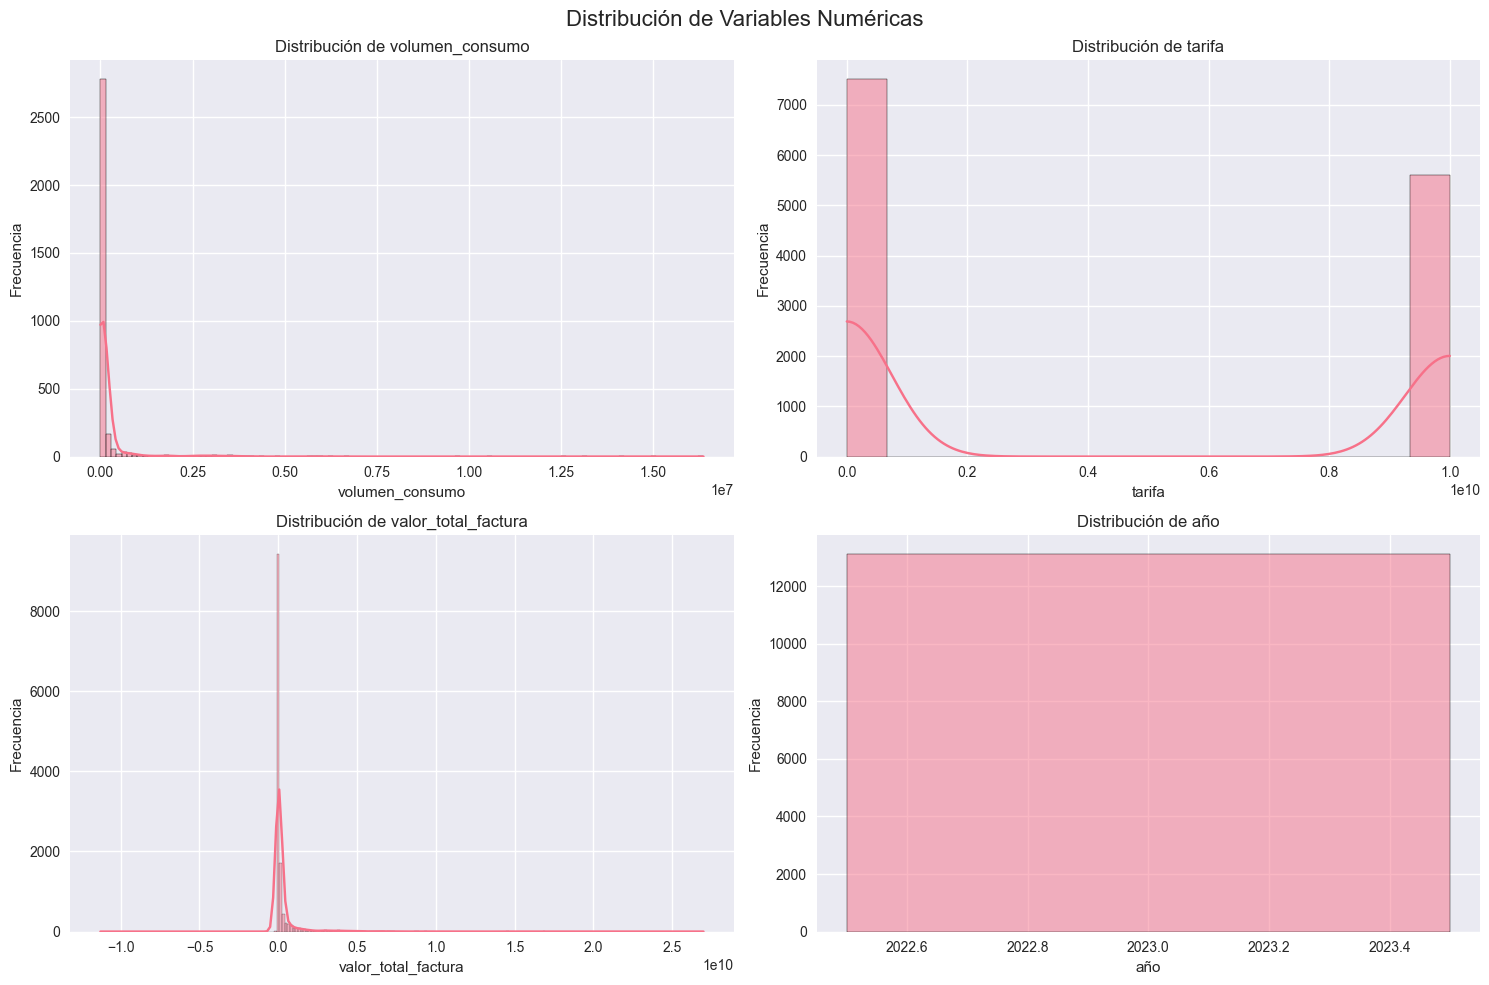

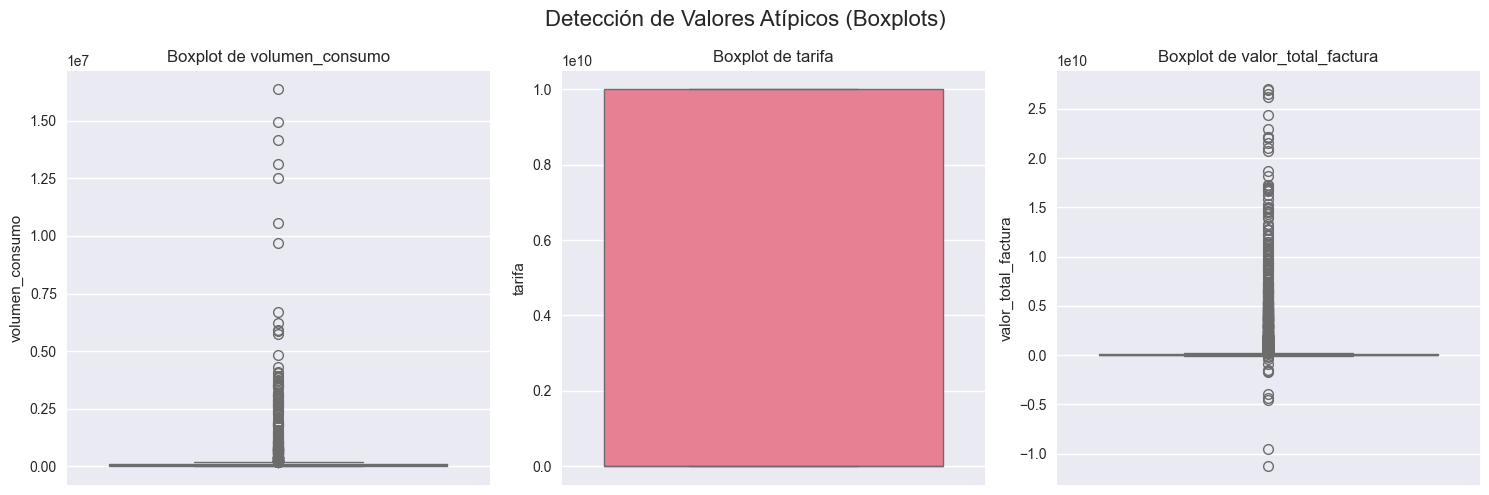

In [8]:
print("📊 ANÁLISIS UNIVARIADO")
print("="*30)

# Crear subplots para variables numéricas
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

if len(variables_numericas) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Distribución de Variables Numéricas', fontsize=16)
    
    for i, var in enumerate(variables_numericas[:4]):
        row = i // 2
        col = i % 2
        
        # Histograma con curva de densidad
        sns.histplot(data=df, x=var, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Distribución de {var}')
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

# Boxplots para detectar outliers
if len(variables_numericas) > 0:
    fig, axes = plt.subplots(1, min(3, len(variables_numericas)), figsize=(15, 5))
    fig.suptitle('Detección de Valores Atípicos (Boxplots)', fontsize=16)
    
    if len(variables_numericas) == 1:
        axes = [axes]
    
    for i, var in enumerate(variables_numericas[:3]):
        sns.boxplot(data=df, y=var, ax=axes[i])
        axes[i].set_title(f'Boxplot de {var}')
    
    plt.tight_layout()
    plt.show()


📊 ANÁLISIS DE VARIABLES CATEGÓRICAS:

🏷️ Variable: ID_FACTURA
ID_FACTURA
541209558910410754120955       230
632930267831468851632930267    157
734538158192882754734538158    152
813511633779499649813511633    149
763876993659864716763876993    147
489852519285256663489852519    145
678094271793754937678094271     96
587375998640175554587375998     93
989642174787567902989642174     91
285465407711006351285465407     72
Name: count, dtype: int64


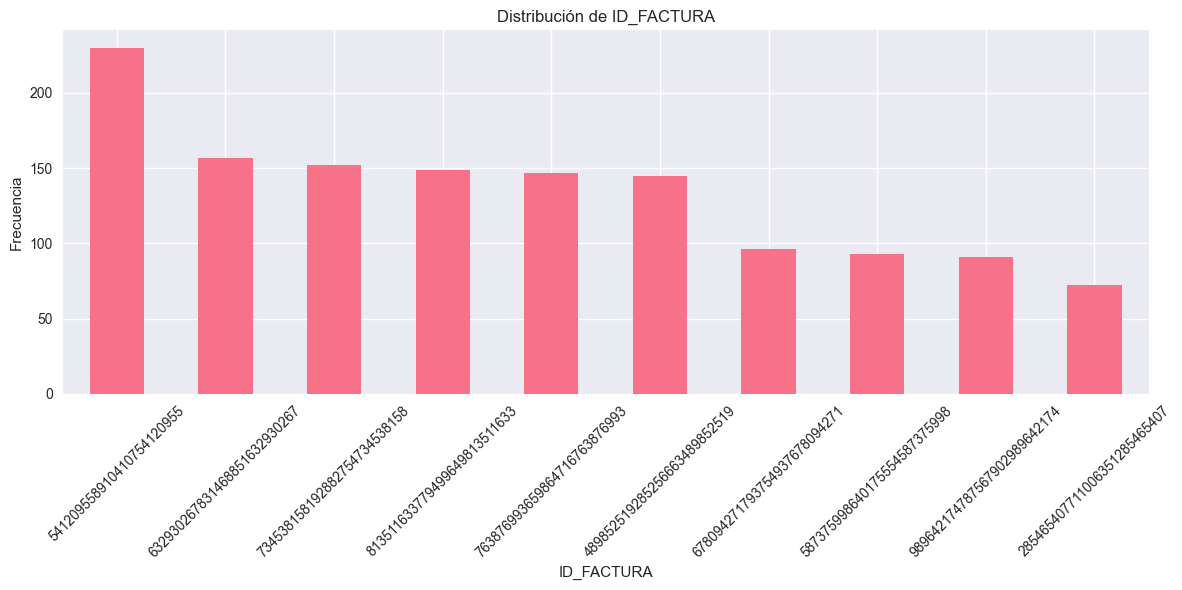


🏷️ Variable: fecha_facturacion
fecha_facturacion
2023-01-02    917
2023-01-03    678
2023-04-05    660
2023-03-02    607
2023-06-05    587
2023-04-04    566
2023-02-03    565
2023-05-04    543
2023-03-03    515
2023-02-02    471
Name: count, dtype: int64


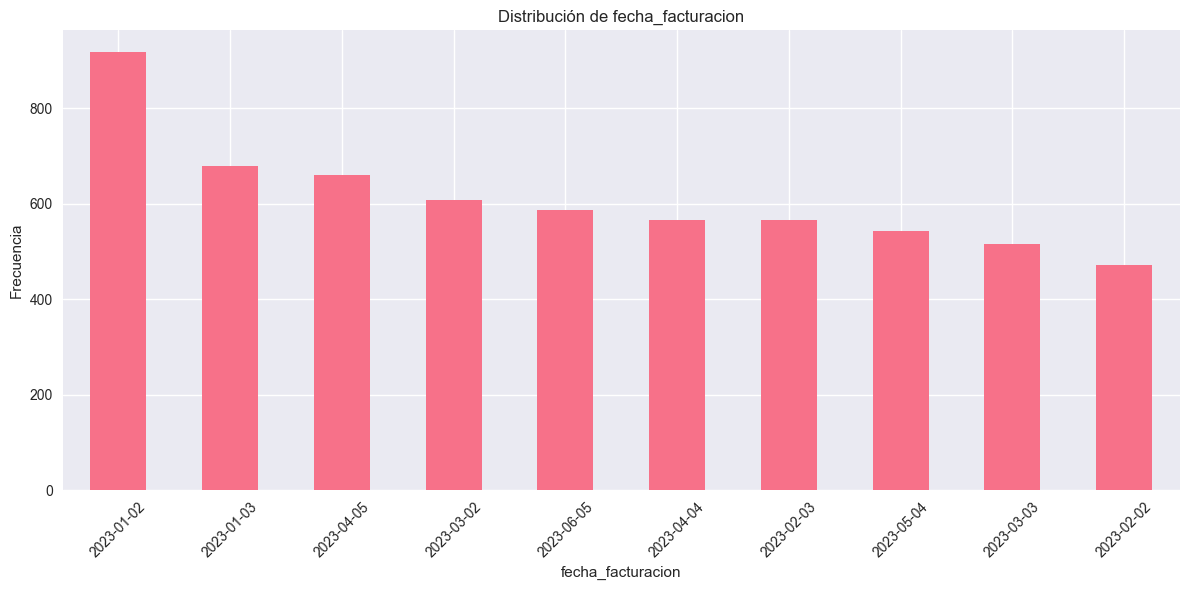


🏷️ Variable: sector_consumo
sector_consumo
Comercializadoras de gas natural    6734
GNCV                                4309
Comercial                           2065
Name: count, dtype: int64


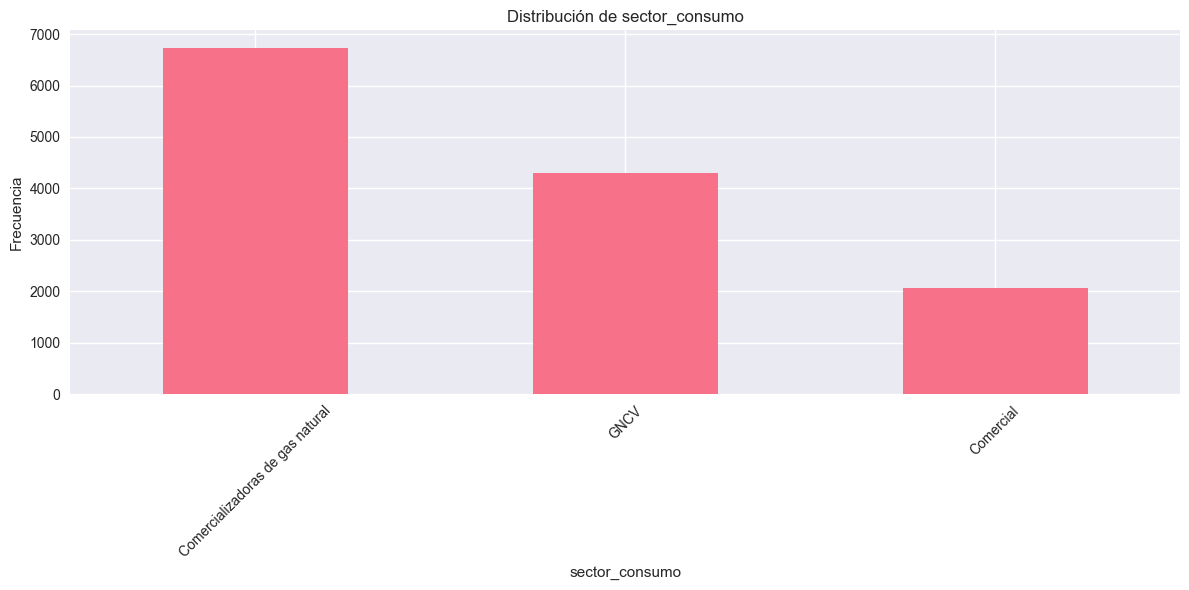

In [9]:
# Análisis de variables categóricas
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

if len(variables_categoricas) > 0:
    print("\n📊 ANÁLISIS DE VARIABLES CATEGÓRICAS:")
    
    for var in variables_categoricas[:3]:  # Solo las primeras 3
        print(f"\n🏷️ Variable: {var}")
        conteos = df[var].value_counts().head(10)
        print(conteos)
        
        # Gráfico de barras
        plt.figure(figsize=(12, 6))
        conteos.plot(kind='bar')
        plt.title(f'Distribución de {var}')
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## 5. Análisis Bivariado

In [10]:
### Explicación del código de análisis bivariado

# Este bloque de código realiza un análisis bivariado, es decir, estudia la relación entre dos variables a la vez para identificar posibles asociaciones o patrones:

# 1. **Matriz de correlación:**  
#    - Calcula la correlación entre todas las variables numéricas del DataFrame y la muestra como un mapa de calor (heatmap).  
#    - Esto permite identificar qué variables están más relacionadas entre sí (correlaciones fuertes, positivas o negativas).

# 2. **Identificación de correlaciones más fuertes:**  
#    - Extrae y ordena los pares de variables con mayor correlación absoluta, mostrando las 5 relaciones más destacadas.  
#    - Esto ayuda a enfocar el análisis en las variables que más influyen unas sobre otras.

# 3. **Gráficos de dispersión:**  
#    - Genera gráficos de dispersión (scatter plots) para visualizar la relación entre las dos primeras variables numéricas.  
#    - Incluye un gráfico con línea de regresión para observar tendencias lineales entre ambas variables.

# En resumen, este análisis es fundamental para descubrir relaciones importantes entre variables, detectar posibles causalidades y orientar la selección de variables para modelos predictivos.

🔗 ANÁLISIS BIVARIADO


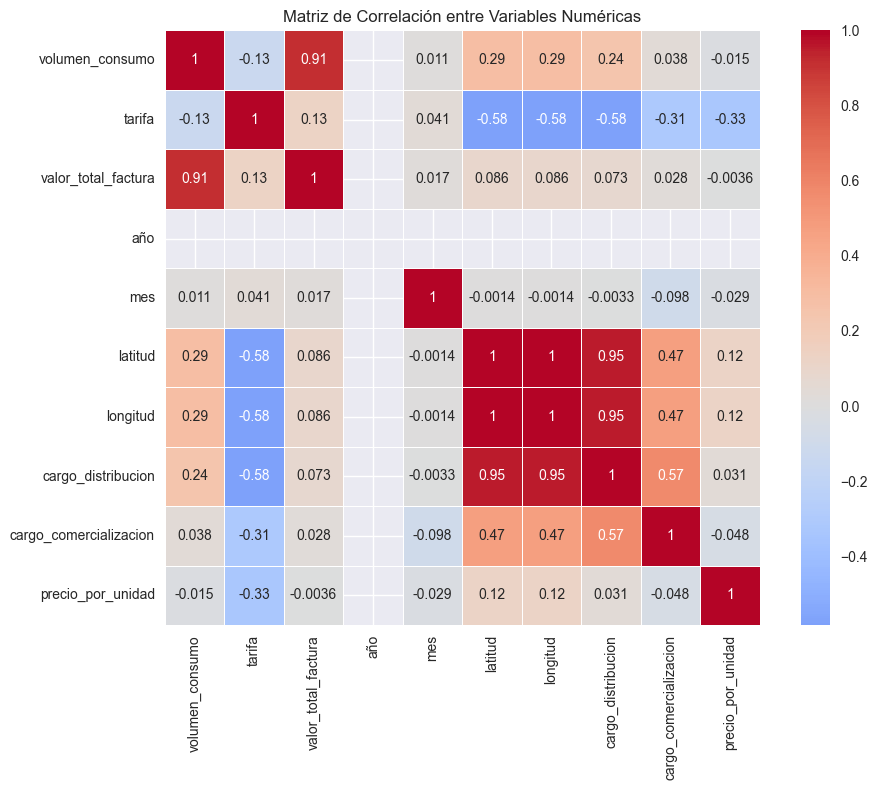


📊 CORRELACIONES MÁS FUERTES:
volumen_consumo vs valor_total_factura: 0.914
volumen_consumo vs año: nan
tarifa vs año: nan
tarifa vs longitud: -0.583
tarifa vs latitud: -0.583


In [11]:
print("🔗 ANÁLISIS BIVARIADO")
print("="*25)

# Matriz de correlación
if len(variables_numericas) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[variables_numericas].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Matriz de Correlación entre Variables Numéricas')
    plt.tight_layout()
    plt.show()
    
    print("\n📊 CORRELACIONES MÁS FUERTES:")
    # Encontrar correlaciones más fuertes (excluyendo la diagonal)
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            corr_pairs.append((var1, var2, abs(corr_value), corr_value))
    
    # Ordenar por correlación absoluta
    corr_pairs.sort(key=lambda x: x[2], reverse=True)
    
    for var1, var2, abs_corr, corr in corr_pairs[:5]:
        print(f"{var1} vs {var2}: {corr:.3f}")

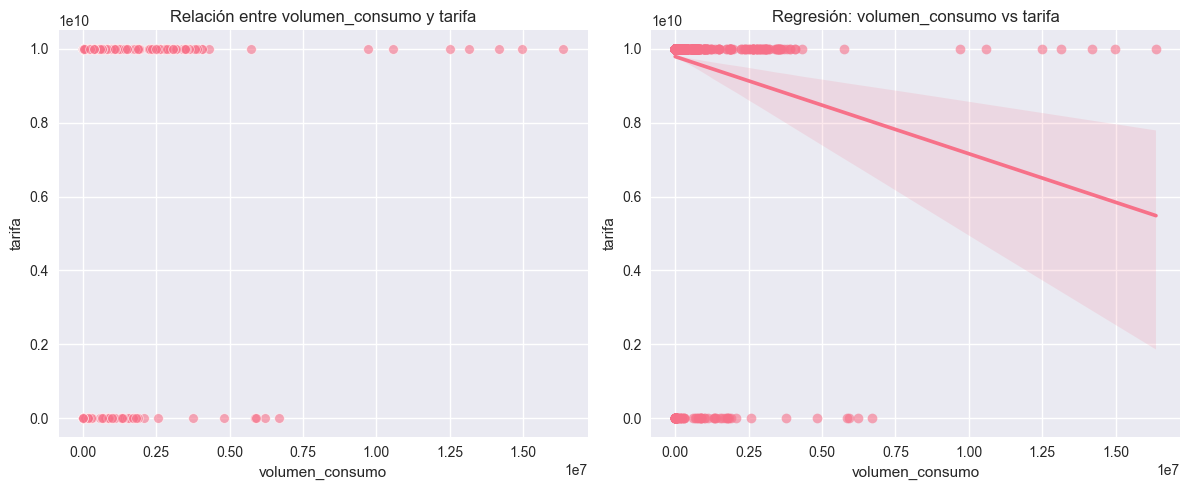

In [12]:
# Gráficos de dispersión para las variables más correlacionadas
if len(variables_numericas) >= 2:
    # Tomar las dos primeras variables numéricas para el ejemplo
    var1, var2 = variables_numericas[0], variables_numericas[1]
    
    plt.figure(figsize=(12, 5))
    
    # Gráfico de dispersión
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=var1, y=var2, alpha=0.6)
    plt.title(f'Relación entre {var1} y {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    
    # Gráfico de dispersión con línea de regresión
    plt.subplot(1, 2, 2)
    sns.regplot(data=df, x=var1, y=var2, scatter_kws={'alpha':0.6})
    plt.title(f'Regresión: {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    
    plt.tight_layout()
    plt.show()

## 6. Análisis Multivariado

In [13]:
### Explicación del código de análisis multivariado

# Este bloque de código realiza un análisis multivariado, es decir, estudia la relación entre más de dos variables al mismo tiempo para descubrir patrones complejos en los datos:

# 1. **Pairplot de variables numéricas:**  
#    - Selecciona hasta 4 variables numéricas y crea un "pairplot" usando Seaborn.  
#    - Este gráfico muestra todas las combinaciones posibles de gráficos de dispersión y distribuciones individuales, permitiendo visualizar cómo se relacionan las variables entre sí y detectar agrupaciones o tendencias.

# 2. **Análisis de Componentes Principales (PCA):**  
#    - Si hay al menos 3 variables numéricas, aplica PCA para reducir la dimensionalidad de los datos y resumir la información en dos componentes principales.
#    - Primero, estandariza los datos para que todas las variables tengan la misma escala.
#    - Luego, calcula los componentes principales y grafica los datos proyectados en este nuevo espacio, mostrando cuánta varianza explica cada componente.
#    - Esto ayuda a identificar patrones globales, agrupaciones y la importancia relativa de cada componente en la variabilidad de los datos.

# En resumen, este código permite explorar relaciones complejas entre varias variables y simplificar la visualización de datos multidimensionales, facilitando la interpretación y el descubrimiento de patrones relevantes.

🌐 ANÁLISIS MULTIVARIADO
📊 Creando pairplot para: ['volumen_consumo', 'tarifa', 'valor_total_factura', 'año']


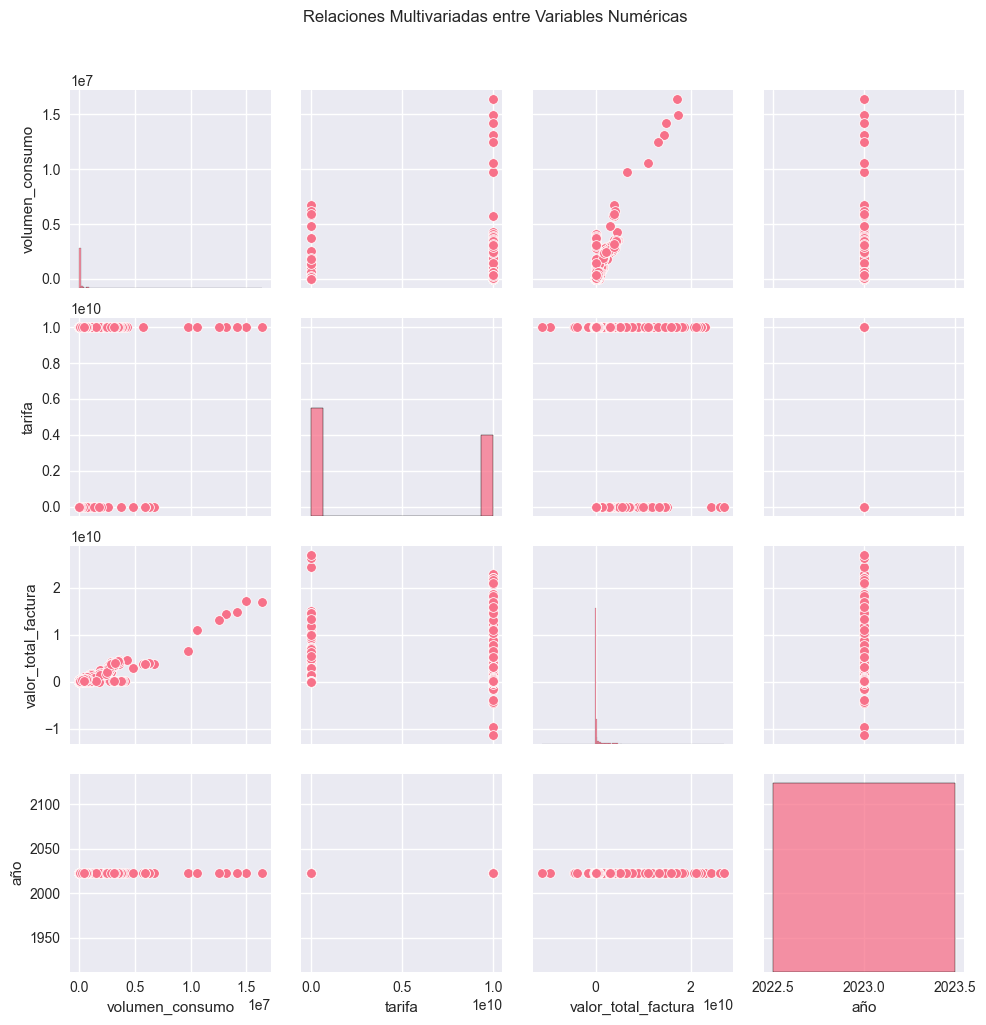

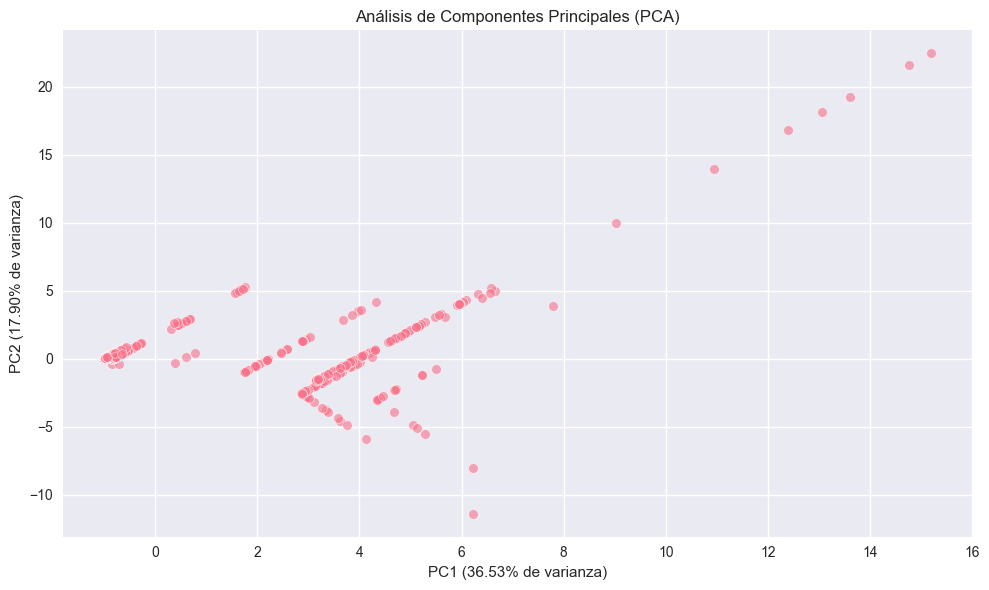


📊 Varianza explicada por PC1: 36.53%
📊 Varianza explicada por PC2: 17.90%
📊 Varianza total explicada: 54.43%


In [14]:
print("🌐 ANÁLISIS MULTIVARIADO")
print("="*30)

# Pairplot para variables numéricas (máximo 4 variables para evitar sobrecarga)
if len(variables_numericas) >= 2:
    vars_para_pairplot = variables_numericas[:4]
    
    print(f"📊 Creando pairplot para: {vars_para_pairplot}")
    
    # Crear pairplot
    sns.pairplot(df[vars_para_pairplot], diag_kind='hist')
    plt.suptitle('Relaciones Multivariadas entre Variables Numéricas', y=1.02)
    plt.tight_layout()
    plt.show()

# Análisis de componentes principales (PCA) si hay suficientes variables
if len(variables_numericas) >= 3:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    
    # Preparar datos para PCA (eliminar NaN)
    datos_pca = df[variables_numericas].dropna()
    
    if len(datos_pca) > 0:
        # Estandarizar datos
        scaler = StandardScaler()
        datos_escalados = scaler.fit_transform(datos_pca)
        
        # Aplicar PCA
        pca = PCA(n_components=2)
        componentes = pca.fit_transform(datos_escalados)
        
        # Crear DataFrame con componentes
        df_pca = pd.DataFrame({
            'PC1': componentes[:, 0],
            'PC2': componentes[:, 1]
        })
        
        # Visualizar PCA
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_pca, x='PC1', y='PC2', alpha=0.6)
        plt.title('Análisis de Componentes Principales (PCA)')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} de varianza)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} de varianza)')
        plt.tight_layout()
        plt.show()
        
        print(f"\n📊 Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.2%}")
        print(f"📊 Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.2%}")
        print(f"📊 Varianza total explicada: {sum(pca.explained_variance_ratio_):.2%}")

## 7. Preparación de datos para modelado

In [15]:
### Explicación del código de preparación de datos para modelado

# Este bloque de código prepara los datos para ser utilizados en modelos de machine learning, siguiendo estos pasos clave:

# 1. **Copia del DataFrame:**  
#    Se crea una copia de los datos originales (`df_modelo = df.copy()`) para trabajar sin modificar el dataset principal.

# 2. **Eliminación de valores nulos:**  
#    Se eliminan las filas que tienen valores faltantes en las variables numéricas importantes, asegurando que los modelos reciban datos completos y evitando errores durante el entrenamiento.

# 3. **Codificación de variables categóricas:**  
#    Si existen variables de tipo texto (categóricas), se transforman en números usando `LabelEncoder`. Esto es necesario porque los algoritmos de machine learning requieren datos numéricos.

# 4. **Selección de la variable objetivo:**  
#    Se define cuál será la variable que el modelo intentará predecir (por ejemplo, el volumen de consumo energético).

# 5. **Selección de variables predictoras:**  
#    Se eligen las columnas que se usarán como entrada para el modelo, excluyendo la variable objetivo y añadiendo las variables categóricas ya codificadas.

# 6. **Preparación de matrices X e y:**  
#    Se crean las variables `X` (con las columnas predictoras) e `y` (con la variable objetivo), que son los formatos estándar para entrenar modelos en scikit-learn.

# En resumen, este código transforma y organiza los datos para que estén listos para el modelado predictivo, asegurando calidad y formato adecuado para los algoritmos de machine learning.

In [16]:
print("🔧 PREPARACIÓN DE DATOS PARA MODELADO")
print("="*45)

# Crear una copia para modelado
df_modelo = df.copy()

# Eliminar filas con valores nulos en variables clave
df_modelo = df_modelo.dropna(subset=variables_numericas)

print(f"📊 Datos después de eliminar NaN: {df_modelo.shape}")

# Codificar variables categóricas si las hay
le = LabelEncoder()
for col in variables_categoricas:
    if col in df_modelo.columns:
        df_modelo[f'{col}_encoded'] = le.fit_transform(df_modelo[col].astype(str))

# Seleccionar variable objetivo (target)
# Asumimos que queremos predecir el volumen de consumo
if 'volumen_consumo' in df_modelo.columns:
    target = 'volumen_consumo'
elif 'valor_total_factura' in df_modelo.columns:
    target = 'valor_total_factura'
else:
    target = variables_numericas[0]  # Tomar la primera variable numérica

print(f"🎯 Variable objetivo seleccionada: {target}")

# Seleccionar variables predictoras
predictoras = [col for col in variables_numericas if col != target]
predictoras += [col for col in df_modelo.columns if col.endswith('_encoded')]

print(f"📊 Variables predictoras: {predictoras}")

# Preparar X e y
X = df_modelo[predictoras]
y = df_modelo[target]

print(f"\n📊 Dimensiones finales:")
print(f"   X (predictoras): {X.shape}")
print(f"   y (objetivo): {y.shape}")

🔧 PREPARACIÓN DE DATOS PARA MODELADO
📊 Datos después de eliminar NaN: (2716, 18)
🎯 Variable objetivo seleccionada: volumen_consumo
📊 Variables predictoras: ['tarifa', 'valor_total_factura', 'año', 'mes', 'latitud', 'longitud', 'cargo_distribucion', 'cargo_comercializacion', 'precio_por_unidad', 'ID_FACTURA_encoded', 'fecha_facturacion_encoded', 'sector_consumo_encoded', 'ubicacion_encoded', 'direccion_encoded', 'actividad_comprador_encoded', 'tipo_gas_encoded', 'temporada_encoded']

📊 Dimensiones finales:
   X (predictoras): (2716, 17)
   y (objetivo): (2716,)


## 8. Modelado con Machine Learning

In [17]:
### Explicación del código de modelado con Machine Learning

# Este bloque de código implementa y compara dos modelos de machine learning para predecir el consumo energético (o la variable objetivo seleccionada):

# 1. **División de datos:**  
#    Se separan los datos en conjuntos de entrenamiento y prueba usando `train_test_split`. El modelo se entrena con una parte de los datos y se evalúa con otra para medir su capacidad de generalización.

# 2. **Estandarización:**  
#    Las variables predictoras se escalan con `StandardScaler` para que todas tengan la misma escala, lo cual es importante para algunos modelos como la regresión lineal.

# 3. **Entrenamiento de modelos:**  
#    - **Regresión Lineal:** Se ajusta un modelo lineal a los datos escalados y se calculan las predicciones.
#    - **Random Forest:** Se entrena un modelo de bosque aleatorio (no requiere escalado) y se obtienen sus predicciones.

# 4. **Evaluación de desempeño:**  
#    Se calculan métricas como R² (qué tan bien predice el modelo) y RMSE (error promedio de las predicciones) para ambos modelos.

# 5. **Comparación y selección:**  
#    Se comparan los resultados de ambos modelos y se selecciona el que tenga mejor desempeño según el R².

# En resumen, este código permite entrenar, evaluar y comparar dos enfoques de machine learning para encontrar el más adecuado en la predicción del consumo energético.

In [18]:
print("🤖 MODELADO CON MACHINE LEARNING")
print("="*40)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 Datos de entrenamiento: {X_train.shape}")
print(f"📊 Datos de prueba: {X_test.shape}")

# Estandarizar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regresión Lineal
print("\n🔍 MODELO 1: REGRESIÓN LINEAL")
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = modelo_lr.predict(X_test_scaled)

# Métricas
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"   R² Score: {r2_lr:.4f}")
print(f"   RMSE: {rmse_lr:.4f}")

# Modelo 2: Random Forest
print("\n🌳 MODELO 2: RANDOM FOREST")
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)  # Random Forest no necesita escalado

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Métricas
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"   R² Score: {r2_rf:.4f}")
print(f"   RMSE: {rmse_rf:.4f}")

# Comparación de modelos
print("\n📊 COMPARACIÓN DE MODELOS:")
print(f"{'Modelo':<15} {'R²':<10} {'RMSE':<15}")
print("-" * 40)
print(f"{'Reg. Lineal':<15} {r2_lr:<10.4f} {rmse_lr:<15.4f}")
print(f"{'Random Forest':<15} {r2_rf:<10.4f} {rmse_rf:<15.4f}")

# Seleccionar el mejor modelo
if r2_rf > r2_lr:
    mejor_modelo = "Random Forest"
    mejor_r2 = r2_rf
else:
    mejor_modelo = "Regresión Lineal"
    mejor_r2 = r2_lr

print(f"\n🏆 MEJOR MODELO: {mejor_modelo} (R² = {mejor_r2:.4f})")

🤖 MODELADO CON MACHINE LEARNING
📊 Datos de entrenamiento: (2172, 17)
📊 Datos de prueba: (544, 17)

🔍 MODELO 1: REGRESIÓN LINEAL
   R² Score: 0.7189
   RMSE: 381178.8140

🌳 MODELO 2: RANDOM FOREST
   R² Score: 0.9215
   RMSE: 201442.6135

📊 COMPARACIÓN DE MODELOS:
Modelo          R²         RMSE           
----------------------------------------
Reg. Lineal     0.7189     381178.8140    
Random Forest   0.9215     201442.6135    

🏆 MEJOR MODELO: Random Forest (R² = 0.9215)


## 9. Visualización de resultados del modelo

In [19]:
### Explicación del código de visualización de resultados del modelo

# Este bloque de código tiene dos objetivos principales:

# 1. **Comparar visualmente las predicciones de los modelos con los valores reales:**  
#    - Se crean dos gráficos de dispersión (scatter plots): uno para la Regresión Lineal y otro para el Random Forest.
#    - En cada gráfico, el eje X representa los valores reales y el eje Y las predicciones del modelo.
#    - La línea roja discontinua indica la referencia perfecta (predicción igual al valor real).  
#   - Si los puntos están cerca de esta línea, el modelo predice bien; si están dispersos, el modelo tiene más errores.

# 2. **Mostrar la importancia de las variables en el modelo Random Forest:**  
#    - Se calcula y grafica la importancia de cada variable predictora según el modelo Random Forest.
#    - Las barras muestran qué variables influyen más en la predicción.
#    - Se imprime un listado con las 5 variables más importantes y su peso relativo.

# En resumen, este código permite evaluar visualmente el desempeño de los modelos y entender qué variables son más relevantes para las predicciones, facilitando la interpretación y la toma de decisiones.

📊 VISUALIZACIÓN DE RESULTADOS


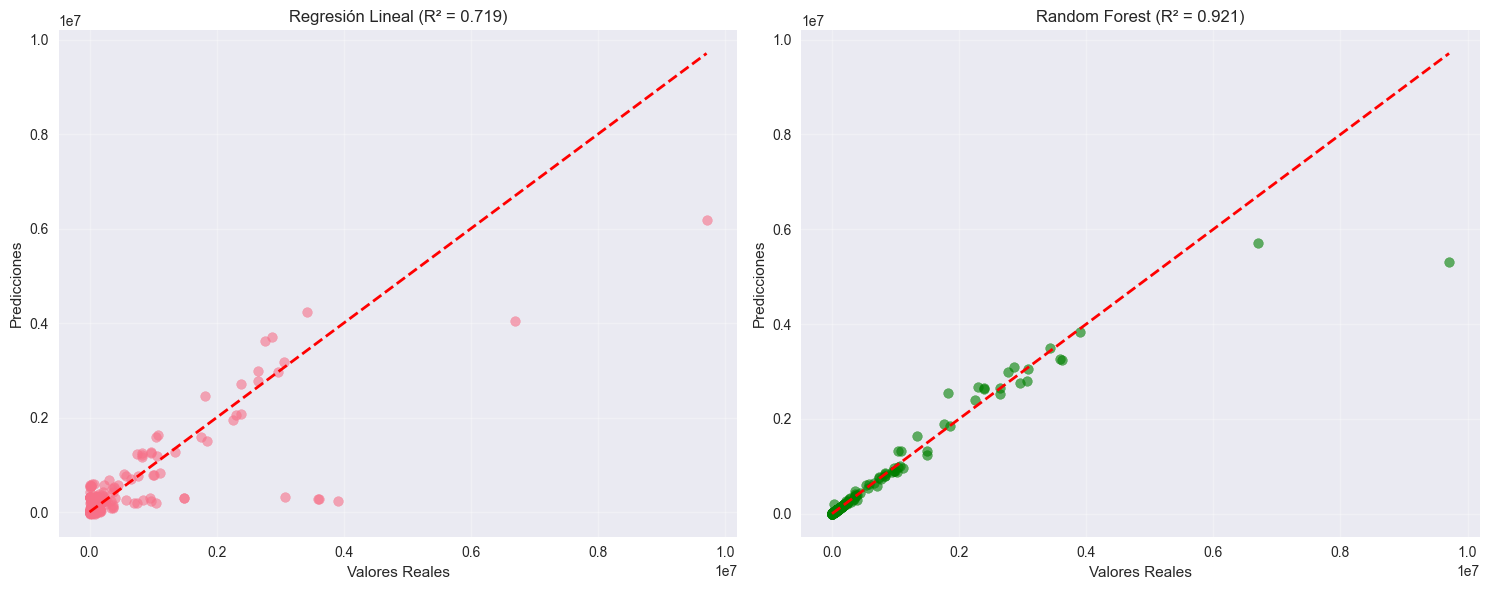

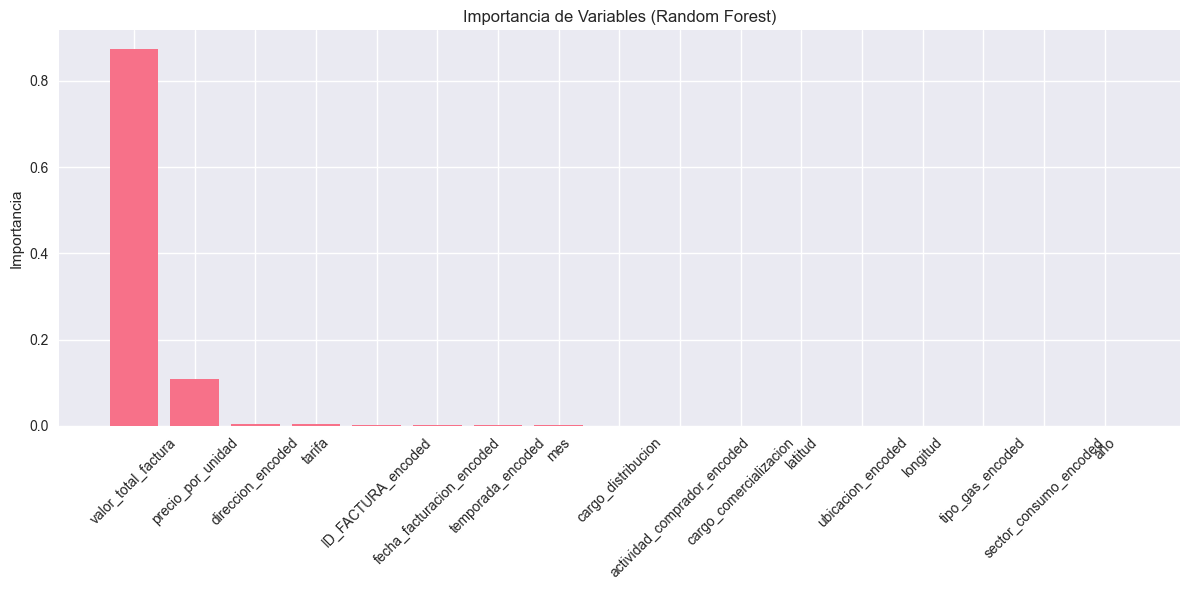


🔍 TOP 5 VARIABLES MÁS IMPORTANTES:
   1. valor_total_factura: 0.8734
   2. precio_por_unidad: 0.1096
   3. direccion_encoded: 0.0049
   4. tarifa: 0.0038
   5. ID_FACTURA_encoded: 0.0025


In [20]:
print("📊 VISUALIZACIÓN DE RESULTADOS")
print("="*35)

# Gráfico de predicciones vs valores reales
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Regresión Lineal
axes[0].scatter(y_test, y_pred_lr, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title(f'Regresión Lineal (R² = {r2_lr:.3f})')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title(f'Random Forest (R² = {r2_rf:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Importancia de variables (solo para Random Forest)
if len(X.columns) > 0:
    importancias = modelo_rf.feature_importances_
    indices = np.argsort(importancias)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title('Importancia de Variables (Random Forest)')
    plt.bar(range(len(importancias)), importancias[indices])
    plt.xticks(range(len(importancias)), [X.columns[i] for i in indices], rotation=45)
    plt.ylabel('Importancia')
    plt.tight_layout()
    plt.show()
    
    print("\n🔍 TOP 5 VARIABLES MÁS IMPORTANTES:")
    for i in range(min(5, len(indices))):
        var_name = X.columns[indices[i]]
        importance = importancias[indices[i]]
        print(f"   {i+1}. {var_name}: {importance:.4f}")

## 10. Conclusiones y Recomendaciones

In [21]:
### Explicación del código de conclusiones y recomendaciones

# Este bloque de código resume los hallazgos clave del análisis y modelado realizado en el notebook:

# 1. **Resumen de datos analizados:**  
#    - Muestra el número total de registros y la cantidad de variables numéricas y categóricas, para recordar el alcance del análisis.

# 2. **Rendimiento de los modelos:**  
#    - Presenta los valores de R² (qué tan bien predicen los modelos) para la Regresión Lineal y el Random Forest, e indica cuál fue el mejor modelo.

# 3. **Interpretación del desempeño:**  
#    - Según el valor de R² del mejor modelo, imprime un mensaje que califica la capacidad predictiva como excelente, buena, moderada o limitada.

# 4. **Recomendaciones para políticas energéticas:**  
#    - Sugiere acciones concretas basadas en los patrones encontrados, como focalizar subsidios o implementar programas de eficiencia.

# 5. **Próximos pasos:**  
#    - Propone líneas de trabajo futuras, como recopilar más datos, probar modelos más avanzados y validar los resultados con expertos.

# En resumen, este código ayuda a comunicar de forma clara y estructurada los resultados del análisis, facilitando la toma de decisiones y la planificación de acciones futuras.

In [22]:
print("📋 RESUMEN DE HALLAZGOS")
print("="*30)

print(f"\n📊 DATOS ANALIZADOS:")
print(f"   • Total de registros: {df.shape[0]:,}")
print(f"   • Variables numéricas: {len(variables_numericas)}")
print(f"   • Variables categóricas: {len(variables_categoricas)}")

print(f"\n🤖 RENDIMIENTO DE MODELOS:")
print(f"   • Regresión Lineal R²: {r2_lr:.3f}")
print(f"   • Random Forest R²: {r2_rf:.3f}")
print(f"   • Mejor modelo: {mejor_modelo}")

print(f"\n💡 INTERPRETACIÓN:")
if mejor_r2 > 0.7:
    print("   ✅ Excelente capacidad predictiva del modelo")
elif mejor_r2 > 0.5:
    print("   ✅ Buena capacidad predictiva del modelo")
elif mejor_r2 > 0.3:
    print("   ⚠️ Capacidad predictiva moderada")
else:
    print("   ❌ Capacidad predictiva limitada")

print(f"\n🎯 RECOMENDACIONES PARA POLÍTICAS ENERGÉTICAS:")
print("   1. Focalizar subsidios según patrones identificados")
print("   2. Implementar programas de eficiencia energética")
print("   3. Monitorear consumo para detectar anomalías")
print("   4. Desarrollar políticas diferenciadas por región")

print(f"\n📈 PRÓXIMOS PASOS:")
print("   • Recopilar más variables socioeconómicas")
print("   • Probar modelos más complejos")
print("   • Validar resultados con expertos del sector")
print("   • Implementar sistema de monitoreo continuo")

📋 RESUMEN DE HALLAZGOS

📊 DATOS ANALIZADOS:
   • Total de registros: 13,108
   • Variables numéricas: 10
   • Variables categóricas: 8

🤖 RENDIMIENTO DE MODELOS:
   • Regresión Lineal R²: 0.719
   • Random Forest R²: 0.921
   • Mejor modelo: Random Forest

💡 INTERPRETACIÓN:
   ✅ Excelente capacidad predictiva del modelo

🎯 RECOMENDACIONES PARA POLÍTICAS ENERGÉTICAS:
   1. Focalizar subsidios según patrones identificados
   2. Implementar programas de eficiencia energética
   3. Monitorear consumo para detectar anomalías
   4. Desarrollar políticas diferenciadas por región

📈 PRÓXIMOS PASOS:
   • Recopilar más variables socioeconómicas
   • Probar modelos más complejos
   • Validar resultados con expertos del sector
   • Implementar sistema de monitoreo continuo


## 11. Exportar resultados

In [23]:
### Explicación del código de exportación de resultados

# Este bloque de código cumple dos funciones principales para documentar y guardar los resultados del análisis:

# 1. **Resumen y exportación de métricas clave:**  
#    - Se crea un diccionario llamado `resultados` que resume los datos más importantes del análisis: número de registros, cantidad de variables, métricas de desempeño de los modelos y cuál fue el mejor modelo.
#    - Este resumen se convierte en un DataFrame y se guarda como un archivo CSV (`resultados_analisis.csv`). Así, se puede compartir o consultar fácilmente el resumen del análisis sin necesidad de abrir el notebook.

# 2. **Exportación de predicciones de los modelos:**  
#    - Se crea un DataFrame con los valores reales y las predicciones de ambos modelos (Regresión Lineal y Random Forest) para el conjunto de prueba.
#    - Este DataFrame se guarda en otro archivo CSV (`predicciones_modelos.csv`), lo que permite analizar los resultados, hacer gráficos o validar las predicciones fuera del notebook.

# En resumen, este código automatiza la generación de archivos con los resultados y predicciones, facilitando la comunicación, el reporte y el análisis posterior de los hallazgos.

In [24]:
# Crear un resumen de resultados para el informe
resultados = {
    'total_registros': df.shape[0],
    'variables_numericas': len(variables_numericas),
    'variables_categoricas': len(variables_categoricas),
    'r2_regresion_lineal': r2_lr,
    'r2_random_forest': r2_rf,
    'mejor_modelo': mejor_modelo,
    'mejor_r2': mejor_r2
}

# Guardar resultados en CSV
pd.DataFrame([resultados]).to_csv('resultados_analisis.csv', index=False)

# Guardar predicciones
predicciones = pd.DataFrame({
    'valores_reales': y_test,
    'predicciones_lr': y_pred_lr,
    'predicciones_rf': y_pred_rf
})
predicciones.to_csv('predicciones_modelos.csv', index=False)

print("✅ Resultados exportados:")
print("   • resultados_analisis.csv")
print("   • predicciones_modelos.csv")
print("\n🎉 ¡Análisis completado exitosamente!")

✅ Resultados exportados:
   • resultados_analisis.csv
   • predicciones_modelos.csv

🎉 ¡Análisis completado exitosamente!
